### 

In [6]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import seaborn as sns
import matplotlib.pyplot as plt

p0: [7.955580599517648 [6.758802915756801  9.152358283278495]
p1: [9.958230290467647 [9.545001085205353  10.37145949572994]
p2: [0.028734720464494153 [0.027703272610375522  0.029766168318612785]


Kd is: 8.0 +/- 0.5
Bmax is: 10.0 +/- 0.2
R^2 is: 0.99875
Sum Squares is: 0.68


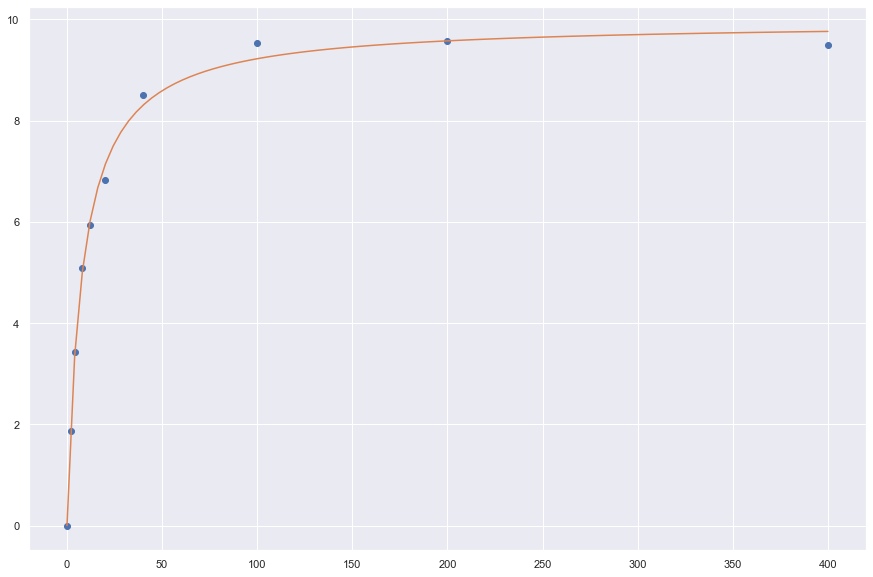

In [11]:
#Raw Data
x_1 = np.array([0, 2, 4, 8, 12, 20, 40, 100, 200, 400]) #substrate concentration 
x_2 = np.array([0, 12, 40, 200, 400])     #non-specific
y_1 = np.array([0, 1.93, 3.55, 5.32, 6.29, 7.41, 9.65, 12.40, 15.33, 20.98]) #bound
y_2 = np.array([0, 0.27, 0.93, 6.29, 11.44]) #non-specific bound

#Appending Data sets
comboX = np.append(x_1, x_2)
comboY = np.append(y_1, y_2)

#Raise exception if data sets are not equal
if len(y_1) != len(x_1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y_2) != len(x_2):
    raise(Exception('Unequal x2 and y2 data length'))

#Equation one to fit ligand binding with background
def function1(x_1, Kd, Bmax, NS): # not all parameters are used here, NS is shared
    return Bmax* x_1 / (Kd + x_1) + NS*x_1

#Equation two to fit back ground
def function2(x_2, NS): # not all parameters are used here, NS is shared
    return NS*x_2

#Combining equation one and two for fitting
def combinedFunction(comboData, Kd, Bmax, NS):
    result1 = function1(x_1, Kd, Bmax, NS)
    result2 = function2(x_2, NS)
    return np.append(result1, result2)
#Ligand Binding Equation
def Ligand_Binding(x, Kd, Bmax):
    return (Bmax*x)/(Kd+x)

# some initial parameter values   #Kd, Bmax, Ns
initialParameters = np.array([1.0, 20, 0.0])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters)

#stats for fitting data and printing results
residuals = comboY - combinedFunction(comboX, fittedParameters[0],fittedParameters[1],fittedParameters[2])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((comboY-np.mean(comboY))**2)
r_squared = 1 - (ss_res/ss_tot)
alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
n = len(comboY)    # number of data points
p = len(initialParameters) # number of parameters
dof = max(0, n - p) # number of degrees of freedom
# student-t value for the dof and confidence level
tval = t.ppf(1.0-alpha/2., dof) 
for i, p,var in zip(range(n),fittedParameters, np.diag(pcov)):
    sigma = var**0.5
    print ('p{0}: [{1} [{2}  {3}]'.format(i, p, p - sigma*tval, p + sigma*tval))    
print ("")
print ("")
print ("Kd is:", round(fittedParameters[0],1), "+/-", round(np.sqrt(pcov[0,0]),1))
print ("Bmax is:", round(fittedParameters[1],1),"+/-", round(np.sqrt(pcov[1,1]),1))
print ("R^2 is:", round(r_squared,5))
print ("Sum Squares is:", round(ss_res,2))

# values for display of fitted function
Kd, Bmax, NS = fittedParameters

#Plotting the data
x = np.linspace(min(x_1), max(x_1), 100)
y_fit_1 = Ligand_Binding(x, Kd, Bmax) # first data set, first equation
y_1s1 = y_1-(NS*x_1)    #subtract background
sns.set()
plt.figure(figsize=(15,10))
raw_data = plt.plot(x_1, y_1s1, 'o') # plot the raw data
plt.plot(x, y_fit_1) # plot the equation using the fitted parameters
plt.show()

# p0 = Kd with 95% confidence interval reported
# p1 = Bmax with 95% confidence interval reported
# p2 = ns with 95% confidence interval reported